# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

df = pd.read_csv("wine_quality_red.tsv.gz", sep="\t")
df.sample(10, random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


Using Pandas in python, I loaded the Wine Data set (red wine) given the PMLB copy, and using tab separation. 

.sample then chose 10 random rows of data from the dataset. The random_state=42 sets a specific part for the random number generator and ensures that the results of a random process are the same every time the code is run. This was so I always saw the same random 10 rows, but I can take this out and get a new random 10 rows every time I run the code.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# YOUR CODE HERE

df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

Description of each column:

fixed acidity: affects wine's taste and stability, does not evaporate easily

volatile acidity: amount of acetic acid, high levels give viegar-y taste

citric acid: smaller amounts give freshness and flavor

residual sugar: sugar left after fermentation

chlorides: amount of salt in the wine

free sulfer dioxide: sulfer dioxide in free form, prevents oxidation

total sulfer dioxide: sum of free and bound sulfer dioxide, affects aroma if high

density: wine density correlates mostly with sugar and alcohol content

pH: wine acidity level, lower pH means more acidic

sulphates: potassium sulphate, can be a antimicrobial 

alcohol: alcohol percentage by volume

target: target variable is the quality score (0-10)

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

Shape:  (1599, 12)

Columns:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target'] 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.

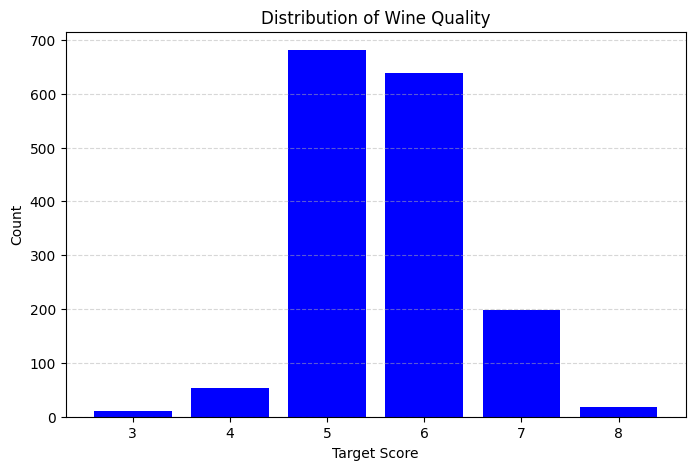

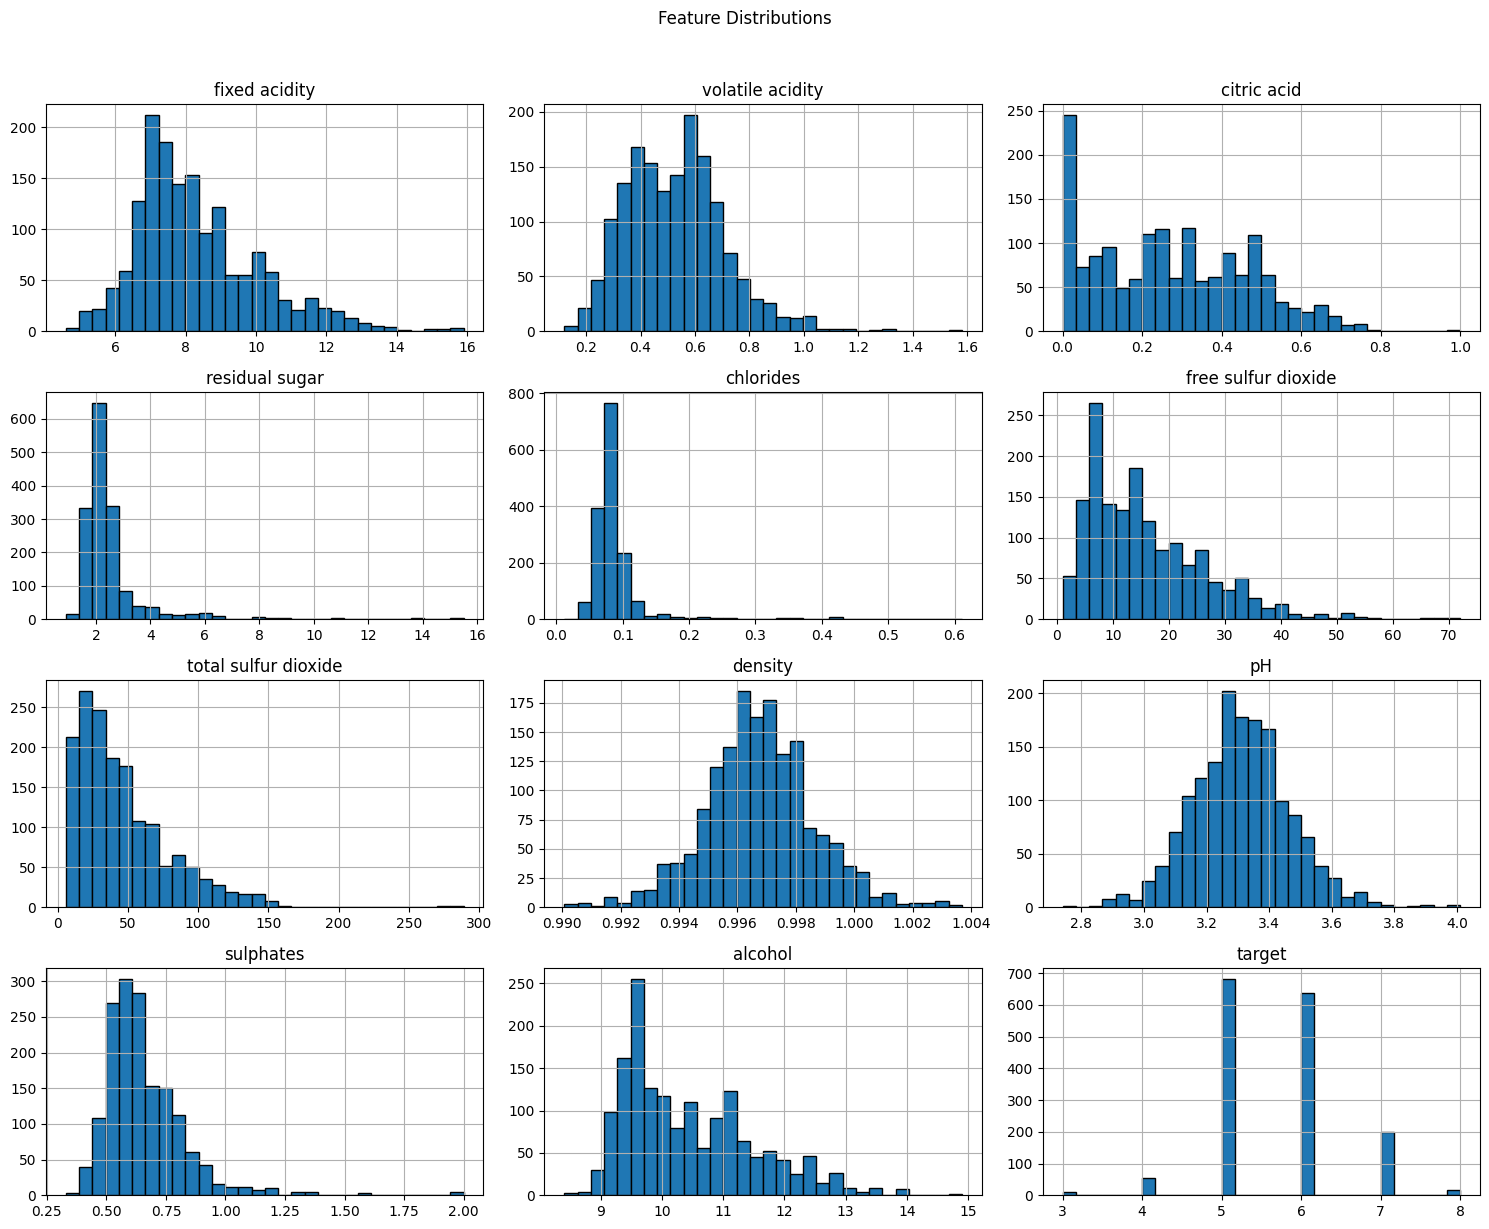

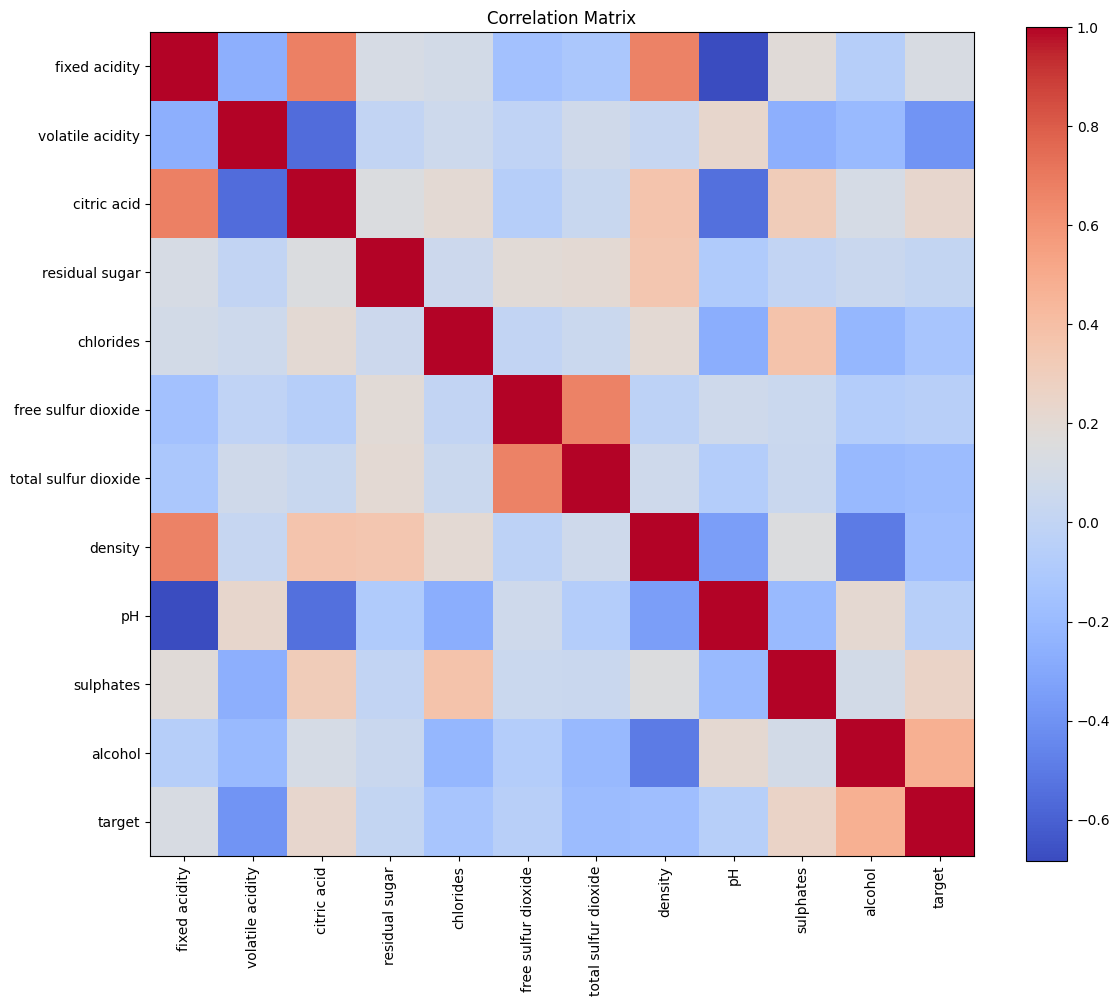

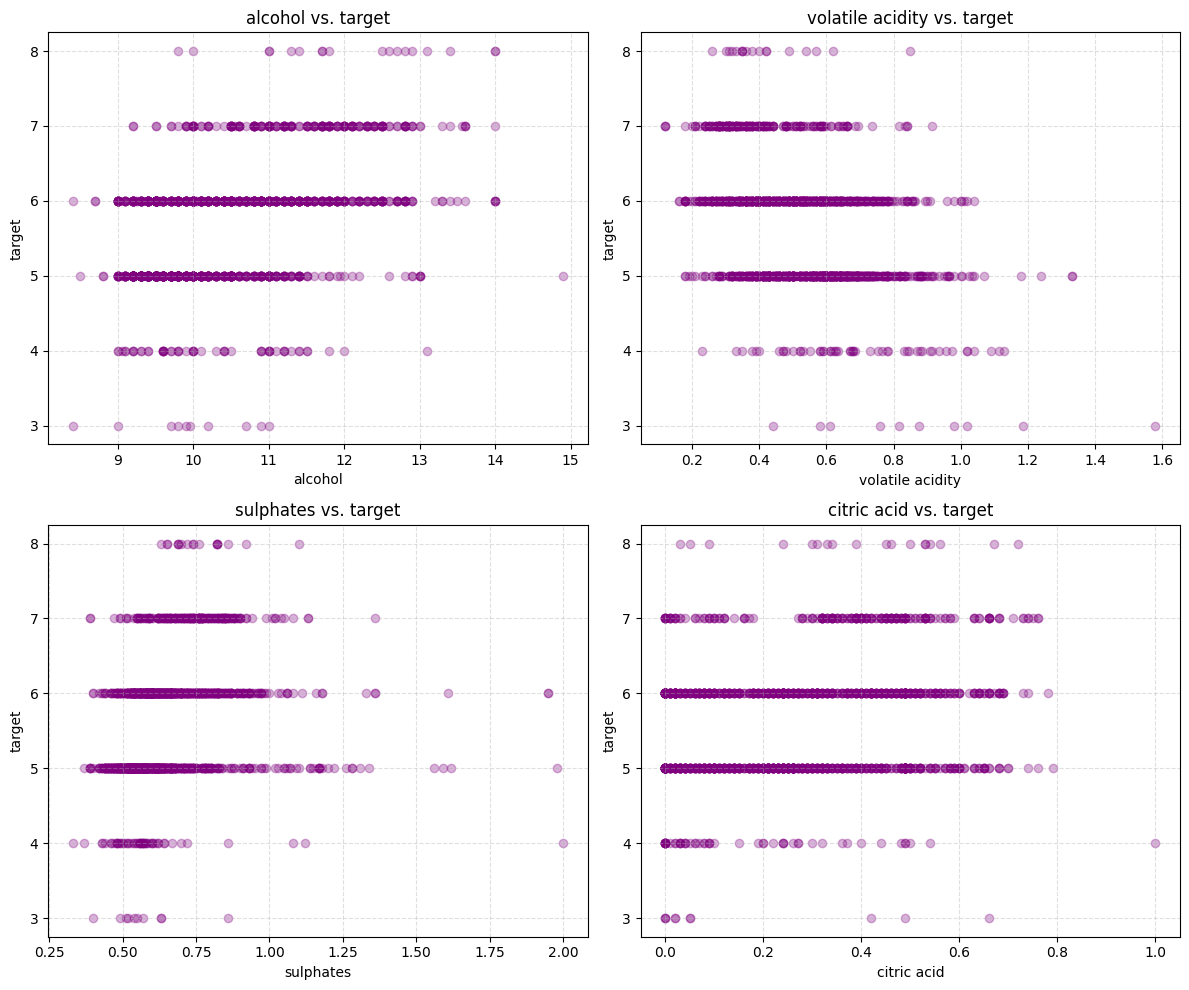

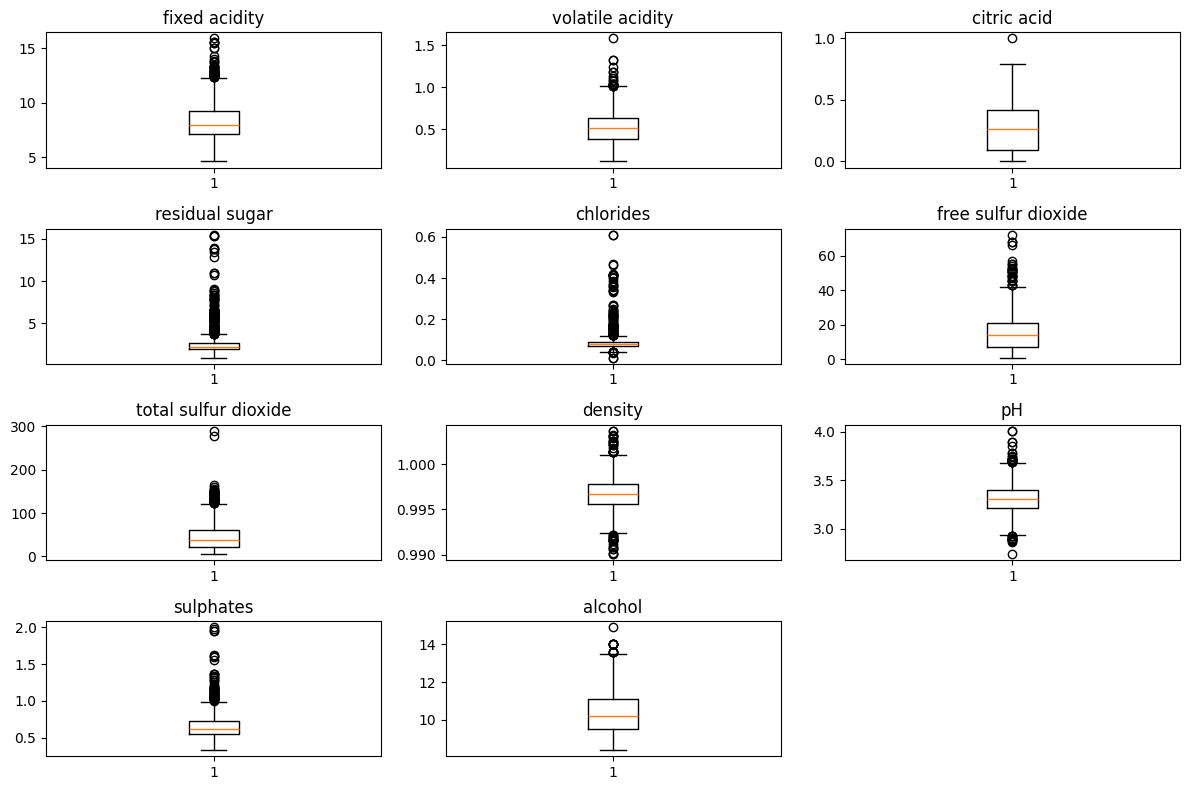

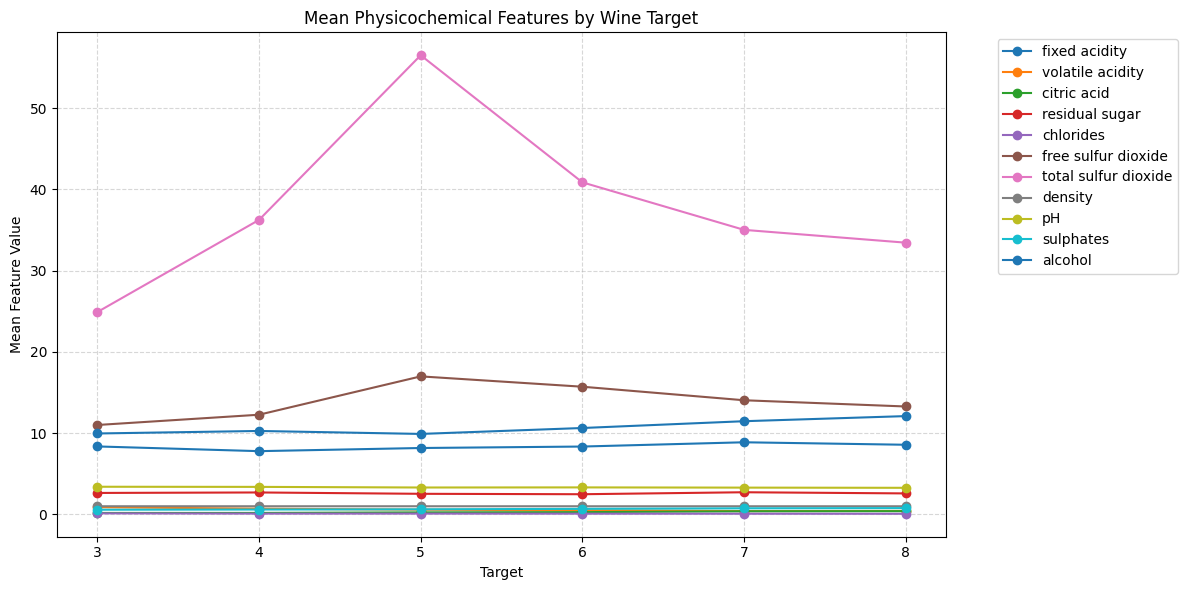


Feature Skewness:
chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
target                  0.217802
pH                      0.193683
density                 0.071288
dtype: float64


In [5]:
# YOUR CODE HERE

print("Shape: ", df.shape)
print("\nColumns: ", df.columns.tolist(), "\n")
print(df.head())
print("\nData Infor:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())
print("\nMissing Values by Column:\n")
print(df.isnull().sum())

target_counts = df['target'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(target_counts.index, target_counts.values, color='blue')
plt.title("Distribution of Wine Quality")
plt.xlabel("Target Score")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

df.hist(bins=30, figsize=(15, 12), layout=(4, 3), edgecolor='black')
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

corr = df.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

key_features = ["alcohol", "volatile acidity", "sulphates", "citric acid"]
plt.figure(figsize=(12, 10))
for i, col in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[col], df["target"], alpha=0.3, color='purple')
    plt.xlabel(col)
    plt.ylabel("target")
    plt.title(f"{col} vs. target")
    plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
numeric_cols = df.columns.drop("target")
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    plt.boxplot(df[col], vert=True)
    plt.title(col)
plt.tight_layout()
plt.show()

mean_features = df.groupby("target").mean()
plt.figure(figsize=(12, 6))
for col in mean_features.columns:
    plt.plot(mean_features.index, mean_features[col], marker='o', label=col)
plt.title("Mean Physicochemical Features by Wine Target")
plt.xlabel("Target")
plt.ylabel("Mean Feature Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

print("\nFeature Skewness:")
print(df.skew().sort_values(ascending=False))

From this full exploratory analysis - I am choosing to future explore the correlation matrix heatmap, the scatter plot of alcohol vs target, and the mean features values by target.

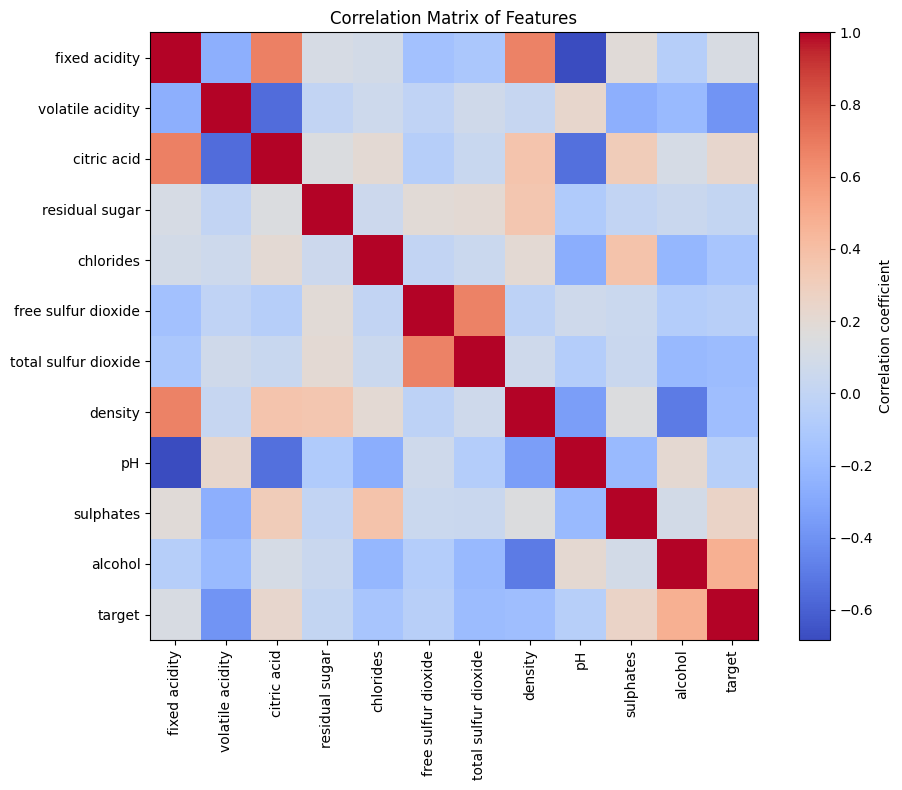

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation coefficient")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

This correlation matrix heatmap is noteworthy because it quickly highlights which features are most influential for wine quality and which features are correlated with each other. 

Examples:

alcohol vs target: strong positive correlation, suggesting wines with higher alcohol content are generally higher rated

volatile acidity vs quality: strong negative correlation, indicating that higher volatile acidity reduces perceived quality

density vs alcohol: strong negative correlation, showing that heavier (denser) wines often have lower alcohol content

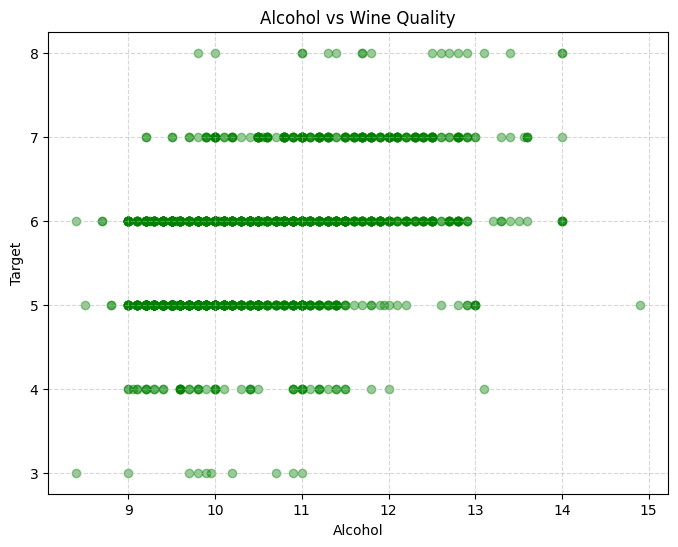

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df['alcohol'], df['target'], alpha=0.4, color='green')
plt.xlabel("Alcohol")
plt.ylabel("Target")
plt.title("Alcohol vs Wine Quality")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

This above model is noteworthy because it shows a clear upward trend - as alcohol increases, wine target quality tends to increase as well.

The scatter indicates variability at each quality level, but the trend is evident.

This supports the correlation heatmap previously, and shows a tangible relationship for prediction or feature selection in models.

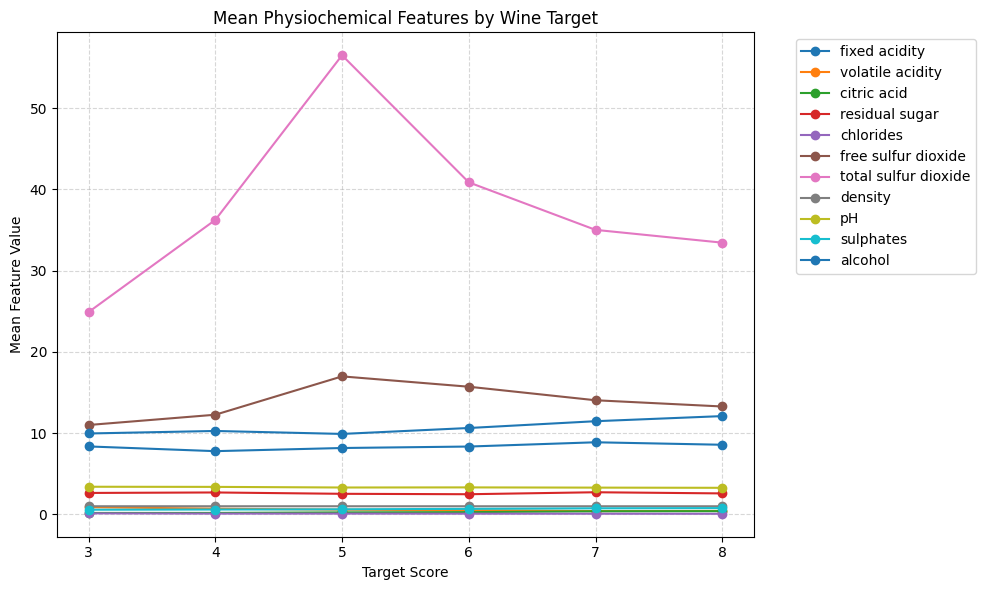

In [8]:
mean_features = df.groupby("target").mean()
plt.figure(figsize=(10, 6))
for col in mean_features.columns:
    plt.plot(mean_features.index, mean_features[col], marker='o', label=col)
plt.title("Mean Physiochemical Features by Wine Target")
plt.xlabel("Target Score")
plt.ylabel("Mean Feature Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This model is noteworthy as well because it gives a whole view of how multiple features change with wine quality.

Alcohol and sulphates generally increase as target quality increases.

volatile acidity and dnesity decrease as target quality increases.

This model shows that good wines are balanced, not just high in one feature, and helps identify which features trend together as wine quality improves.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

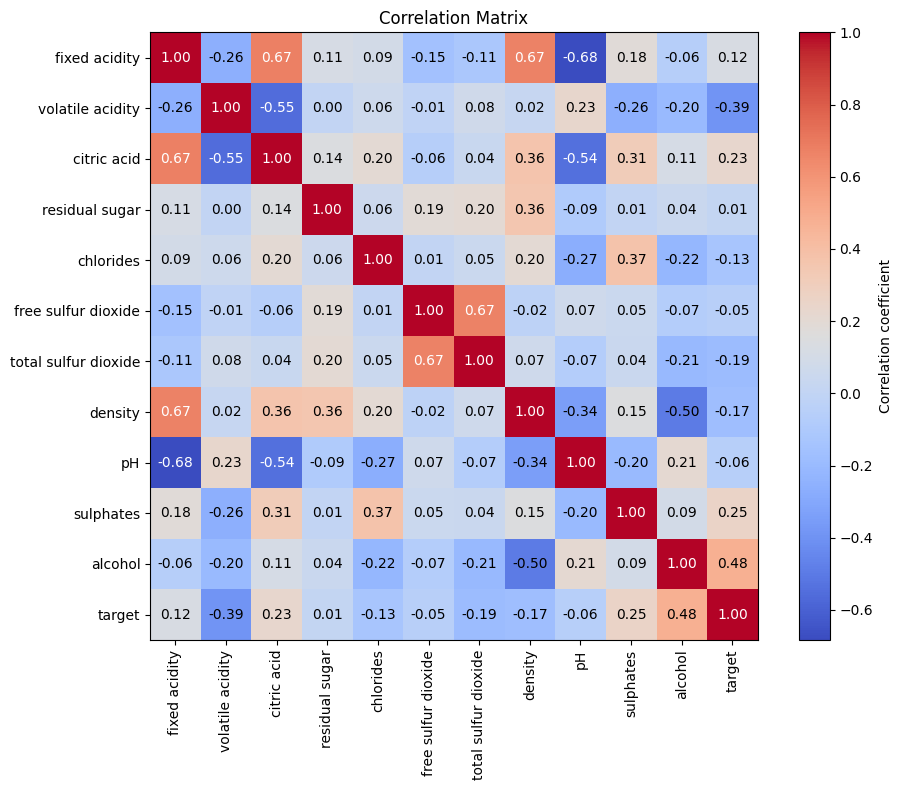

In [9]:
# YOUR CODE HERE

corr = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation coefficient')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black' if abs(corr.iloc[i, j]) < 0.5 else 'white')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

There are two pairs of features columns with the same correlations, that are the most correlated of the dataset.

free sulfur dioxide and total sulfur dioxide = 0.67

fixed acidity and citric acid = 0.67

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

LinearRegression:

ordinary least squares linear regression

scikit-learn doc: https://scikit-learn.org/stable/modules/linear_model.html?utm_source=chatgpt.com

wikipedia link: https://en.wikipedia.org/wiki/Support_vector_machine?utm_source=chatgpt.com 



DecisionTreeRegressor:

scikit-learn doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?utm_source=chatgpt.com 

wikipedia link: https://en.wikipedia.org/wiki/Decision_tree?utm_source=chatgpt.com 



RandomForestRegressor:

scikit-learn doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 
wikipedia link: https://en.wikipedia.org/wiki/Random_forest?utm_source=chatgpt.com 

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

--- LinearRegression ---
MSE (L2 loss): 0.4168
MAE (L1 loss): 0.5005

--- DecisionTree ---
MSE (L2 loss): 0.0000
MAE (L1 loss): 0.0000

--- RandomForest ---
MSE (L2 loss): 0.0445
MAE (L1 loss): 0.1486



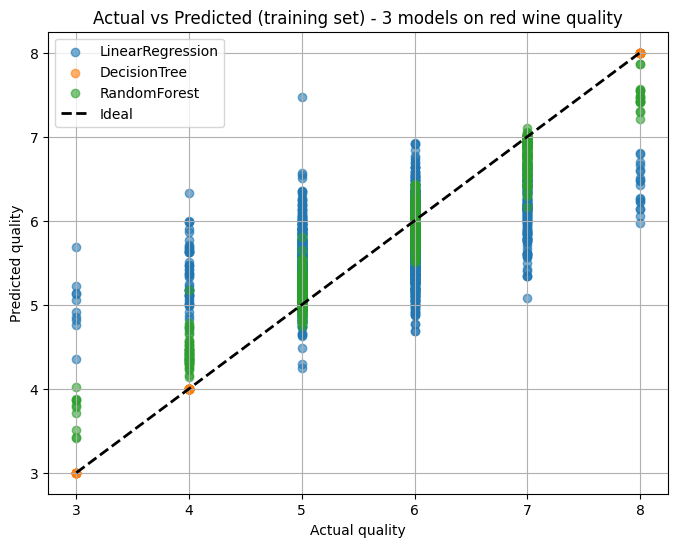

In [10]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df.drop(columns=["target"]).values
y = df["target"].values

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=0)
}
results = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    results[name] = {"y_pred": y_pred, "mse": mse, "mae": mae}
    print(f"--- {name} ---")
    print(f"MSE (L2 loss): {mse:.4f}")
    print(f"MAE (L1 loss): {mae:.4f}")
    print()

plt.figure(figsize=(8,6))
plt.scatter(y, results["LinearRegression"]["y_pred"], label="LinearRegression", alpha=0.6)
plt.scatter(y, results["DecisionTree"]["y_pred"], label="DecisionTree", alpha=0.6)
plt.scatter(y, results["RandomForest"]["y_pred"], label="RandomForest", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label="Ideal")
plt.xlabel("Actual quality")
plt.ylabel("Predicted quality")
plt.legend()
plt.title("Actual vs Predicted (training set) - 3 models on red wine quality")
plt.grid(True)
plt.show()

Since I trained and predicted on the same data, the errors (L1 and L2) show training error.

The scatter plot shows how close the predictions are to the ideal diagonal line y_pred. the closer to the line, the better the training data is.

Th Linear Regression shows both overfitting and underfitting on the ideal line.

The Decision Tree model overfits - the predictions match perfectly on the training data.

The Random Forest gives a good balance over the training data line.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

--- LinearRegression ---
Training MSE (L2 Loss): 0.4168
5-Fold CV MSE (L2 loss): 0.4366

--- DecisionTree ---
Training MSE (L2 Loss): 0.0000
5-Fold CV MSE (L2 loss): 0.8255

--- RandomForest ---
Training MSE (L2 Loss): 0.0445
5-Fold CV MSE (L2 loss): 0.4259



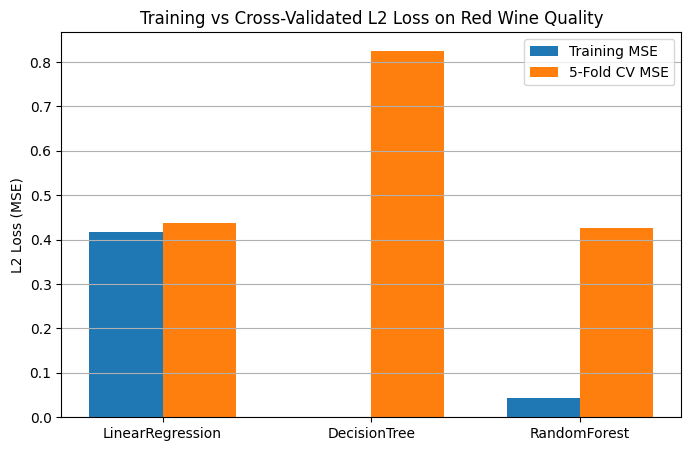

In [11]:
# YOUR CODE HERE

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    mse_train = mean_squared_error(y, y_pred)

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_cv = -cv_scores.mean()

    results[name] = {"mse_train": mse_train, "mse_cv": mse_cv}

    print(f"--- {name} ---")
    print(f"Training MSE (L2 Loss): {mse_train:.4f}")
    print(f"5-Fold CV MSE (L2 loss): {mse_cv:.4f}")
    print()

import matplotlib.pyplot as plt

model_names = list(results.keys())
train_mse = [results[m]["mse_train"] for m in model_names]
cv_mse = [results[m]["mse_cv"] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_mse, width, label="Training MSE")
plt.bar(x + width/2, cv_mse, width, label="5-Fold CV MSE")
plt.xticks(x, model_names)
plt.ylabel("L2 Loss (MSE)")
plt.title("Training vs Cross-Validated L2 Loss on Red Wine Quality")
plt.legend()
plt.grid(axis='y')
plt.show()

The cross-validated MSE uses 5-fold cross-validation where the data is split into 5 folds. Each fold is used once as a validation set, and the remaining 4 folds for training. The mean MSE across the 5 folds is then calculated.

The training MSE is lower than the CV MSE. There are some large differences, like the decision tree has a 0 training zero but a much higher CV error (overfitting). The Linear Regression is more stable, the CV and training errors are much closer.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [12]:
# YOUR CODE HERE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = {
    "LinearRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "DecisionTree": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', DecisionTreeRegressor(random_state=0))
    ]),
    "RandomForest": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))
    ])
}

results = {}
for name, pipe in pipelines.items():
    pipe.fit(X, y)
    y_pred = pipe.predict(X)
    mse = mean_squared_error(y, y_pred)
    results[name] = mse
    print(f"{name} - L2 Loss (MSE) after standardization: {mse:.4f}")

LinearRegression - L2 Loss (MSE) after standardization: 0.4168
DecisionTree - L2 Loss (MSE) after standardization: 0.0000


RandomForest - L2 Loss (MSE) after standardization: 0.0445


These L2 losses compare to the ones in problem 6 by being much lower. The Decision Tree remains the same at 0, but the Lienar Regression and Random Forest L2 losses are both lower in this preprocessed data stndardization than in the original problem 6 training data set.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

Randomly trying 1000 decision trees with different depth limits is unlikely to reliably improve performance and risks overfitting, so a more systematic approach like grid search or randomized search specifically with cross-validation would work better.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

Based on all the models I built, the RandomForestRegressor was the best model for the red wine quality dataset. 

I chose this one for multiple reasons, including that the L2 loss on cross-validation is a measure of predictive accuracy while controlling for overfitting. There is a lower difference between training error and cross-validated error indicates less overfitting. There is also the ability to model non-linear relationships which is important because wine quality depends on a lot of complex interactions.

The RandomForest model handles non-linear relationships and feature interactions automatically. It reduces overfitting compared to a single DecisionTree. It produces low cross-validated L2 loss, meaning it generalizes well to unseen samples.

The LinearRegression model underperforms because the relationship is not always purely linear. The DecisionTree model overfits easily and had zero training error but much higher cross-validation error. RandomForest balances all of this, the bias and variance, and making it the most reliable choice.